# SIR for two strains (partial immunity)
This is the Python version of program 4.1 from page 118 of "Modeling Infectious Disease in humans and animals" by Keeling & Rohani.
This is based on code written by Ilias Soumpasis.

In [1]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [2]:
#Parameters (rates here are specified in terms of days)

beta=np.array([260, 520])/365.0; #transmission rates
gamma=np.array([1, 1])/7.0; #recovery rates
nu=mu=1/(70*365.0); #death and birth rate
alpha=np.array([0.5, 0.4]); # modified susceptiblity to strain i for those individuals recovered from the other strain.
a=np.array([0.4, 0.5]); #modified transmission rate of strain i from those individuals that have recovered from the other strain

ND=MaxTime=100*365; #number of days
TS=1.0 #time step

#initial conditions
NSS=0.1; #susceptible to both
NIS=1e-4; #infected, susceptible respc.
NRS=0.02; #recovered, susceptible respc.
NRI=0.0; #recovered, infected respc.
NSI=1e-4; #susceptible, infected respc
NSR=0.5; #susceptible, recovered respc
NIR=0.0 #infected recovered
I=np.array([NSS, NIS,NRS,NRI,NSI,NSR,NIR])
NRR= 1-sum(I) #recovered to both
INPUT=np.array([NSS, NIS,NRS,NRI,NSI,NSR,NIR,NRR])


In [4]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((8))
	V = INP   
	lambda1=beta[0]*(V[1]+a[0]*V[6])  
	lambda2=beta[1]*(V[4]+a[1]*V[3])
	Y[0] = mu - V[0] * (lambda1 + lambda2) - mu * V[0]
	Y[1] = V[0]*lambda1 - gamma[0]*V[1] - mu*V[1]
	Y[2] = gamma[0]*V[1] - alpha[1]*V[2]*lambda2 - mu*V[2]
	Y[3] = alpha[1]*V[2]*lambda2 - gamma[1]*V[3] - mu*V[3]
	Y[4] = V[0] * lambda2 - gamma[1]*V[4] - mu*V[4]
	Y[5] = gamma[1]*V[4] - alpha[0]*V[5]*lambda1 - mu*V[5]
	Y[6] = alpha[0]*V[5]*lambda1 - gamma[0]*V[6] - mu*V[6]
	Y[7] = gamma[0] * V[6] + gamma[1]*V[3] - mu * V[7]
	return Y   # For odeint

In [5]:
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

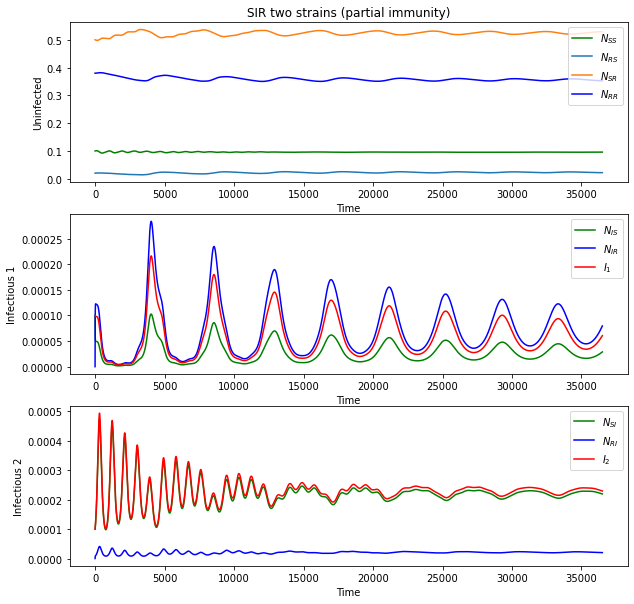

In [14]:
#Ploting
fig=plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('SIR two strains (partial immunity)')

fig.add_subplot(311)
plt.plot(RES[:,0], 'g-', label=r'$N_{SS}$')
plt.plot(RES[:,2],  label=r'$N_{RS}$')
plt.plot(RES[:,5],  label=r'$N_{SR}$')
plt.plot(RES[:,7], 'b-', label=r'$N_{RR}$')
plt.xlabel ('Time')
plt.ylabel ('Uninfected')
plt.legend(loc=1)
fig.add_subplot(312)
plt.plot(RES[:,1], 'g-', label=r'$N_{IS}$')
plt.plot(RES[:,6], 'b-', label=r'$N_{IR}$')
plt.plot((RES[:,1]+a[0]*RES[:,6]), 'r-', label=r'$I_1$')
plt.xlabel ('Time')
plt.ylabel ('Infectious 1')
plt.legend(loc=1)
fig.add_subplot(313)
plt.plot(RES[:,4], 'g-', label=r'$N_{SI}$')
plt.plot(RES[:,3], 'b-', label=r'$N_{RI}$')
plt.plot((RES[:,4]+a[1]*RES[:,3]), 'r-', label=r'$I_2$')
plt.xlabel ('Time')
plt.ylabel ('Infectious 2')
plt.legend(loc=1)

plt.show()
fig.savefig('two_strains_partial_immunity.pdf')